In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_rows', 10)

from LeNetModel import *
import theano.tensor as T

from scipy.misc import imread, imresize

from ipywidgets import FloatProgress
from IPython.display import display

from time import time

/Users/johnstamford/anaconda/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
df = pd.read_csv('Data/driver_imgs_list.csv')

In [3]:
path = "/Users/johnstamford/Desktop/StateFarmDriver Project/Data/"
img = imread(path + "train/c5/img_274.jpg", mode="F")

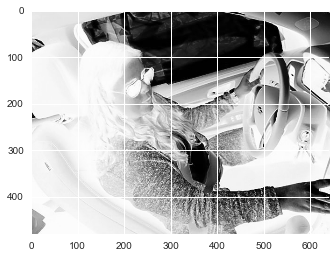

In [4]:
plt.imshow(img)

## Setup Variables
Q: should I use the same weights (rng) for each layer or generate new ones for each layer?

nkerns can be adjusted for each layer

In [5]:
rng = np.random.RandomState()

x = T.matrix('x')
layer0_input = x.reshape((1, 1, 480, 640))

nkerns=[30, 20, 10, 5, 1]

## Add the layers

In [6]:
layer0 = LeNetConvPoolLayer(
        rng,
        input=layer0_input,
        image_shape=(1, 1, 480, 640),
        filter_shape=(nkerns[0], 1, 5, 5),
        poolsize=(2, 2)
    )

layer0_test = theano.function([x], layer0.output)

In [7]:
layer1 = LeNetConvPoolLayer(
        rng,
        input=layer0.output,
        image_shape=(1, nkerns[0], 238, 318),
        filter_shape=(nkerns[1], nkerns[0], 5, 5),
        poolsize=(2, 2)
    )

layer1_test = theano.function([x], layer1.output)

In [8]:
layer2 = LeNetConvPoolLayer(
        rng,
        input=layer1.output,
        image_shape=(1, nkerns[1], 117, 157),
        filter_shape=(nkerns[2], nkerns[1], 5, 5),
        poolsize=(2, 2)
    )

layer2_test = theano.function([x], layer2.output)

In [9]:
layer3 = LeNetConvPoolLayer(
        rng,
        input=layer2.output,
        image_shape=(1, nkerns[2], 56, 76),
        filter_shape=(nkerns[3], nkerns[2], 5, 5),
        poolsize=(2, 2)
    )

layer3_test = theano.function([x], layer3.output)

In [10]:
layer4 = LeNetConvPoolLayer(
        rng,
        input=layer3.output,
        image_shape=(1, nkerns[3], 26, 36),
        filter_shape=(nkerns[4], nkerns[3], 5, 5),
        poolsize=(2, 2)
    )

layer4_test = theano.function([x], layer4.output)

## Test the layers

In [11]:
img_layer0 = layer0_test(img)
img_layer1 = layer1_test(img)
img_layer2 = layer2_test(img)
img_layer3 = layer3_test(img)
img_layer4 = layer4_test(img)

In [12]:
img_layer4 = layer4_test(img)

In [13]:
img_layer4.shape

(1, 1, 11, 16)

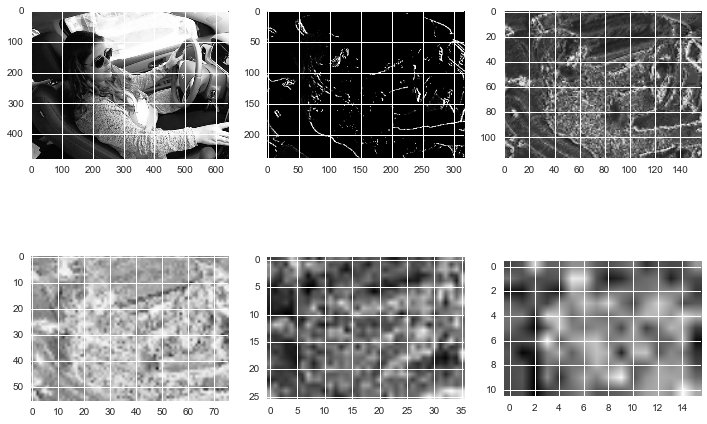

In [14]:
plt.figure(figsize=(12,8))
plt.subplot(231)
plt.imshow(img, cmap='Greys_r')

plt.subplot(232)
plt.imshow(img_layer0[0][0], cmap='Greys_r')
plt.savefig('demo.jpg')

plt.subplot(233)
plt.imshow(img_layer1[0][0], cmap='Greys_r')
plt.savefig('demo.jpg')

plt.subplot(234)
plt.imshow(img_layer2[0][0], cmap='Greys_r')
plt.savefig('demo.jpg')

plt.subplot(235)
plt.imshow(img_layer3[0][0], cmap='Greys_r')
plt.savefig('demo.jpg')

plt.subplot(236)
plt.imshow(img_layer4[0][0], cmap='Greys_r')
plt.savefig('demo.jpg')

In [15]:
df

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg
...,...,...,...
22419,p081,c9,img_56936.jpg
22420,p081,c9,img_46218.jpg
22421,p081,c9,img_25946.jpg
22422,p081,c9,img_67850.jpg


In [16]:
# Get the data into pandas
value = img_layer4.reshape([1,176])
value = pd.DataFrame(value)
value.shape

(1, 176)

In [17]:
# Get the data to loop through
data = df[(df.classname == 'c0') | (df.classname == 'c1')]

In [18]:
# A new dataframe to store the new data
newData = pd.DataFrame(columns=range(1,value.shape[1]))
#newData['Class'] = np.nan
newData.shape

(0, 175)

In [19]:
# Add the new row
value = img_layer4.reshape([1,176])
value = pd.DataFrame(value)
#value['Class'] = np.nan
value.shape

newData = newData.append(value)

In [20]:
newData.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            166, 167, 168, 169, 170, 171, 172, 173, 174, 175],
           dtype='int64', length=176)

In [21]:
data.columns

Index([u'subject', u'classname', u'img'], dtype='object')

In [22]:
data.shape

(4756, 3)

In [23]:
data = data.copy(deep=True)

In [24]:
for i in data.index.values:
    
    #print(data.iloc[i].img)
    img_name = df.iloc[i].img
    cla = df.iloc[i].classname


In [25]:
# A new dataframe to store the new data
newData = pd.DataFrame(columns=range(1,value.shape[1]))
newData['Class'] = np.nan

In [26]:
newData

,1,2,3,4,5,6,7,8,9,10,...,167,168,169,170,171,172,173,174,175,Class


In [27]:
maxCount = data.shape[0]
t0 = time()

f = FloatProgress(min=0, max=maxCount)
display(f)

count = 0



for i in data.index.values:
    
    #print(data.iloc[i].img)
    img_name = df.iloc[i].img
    cla = df.iloc[i].classname
    
    img = imread(path + "train/" + cla + "/" + img_name, mode="F")
    
    img_layer4 = layer4_test(img)
    
    # Add the new row
    # Add the new row
    value = img_layer4.reshape([1,176])
    value = pd.DataFrame(value)
    value['Class'] = cla
    value.shape

    newData = newData.append(value)
    
    count = count + 1
    f.value = count

t1 = time()
print("Completed Time %i in %.2f sec" % ( maxCount, (t1 - t0)))

KeyboardInterrupt: 

In [ ]:
newData

In [ ]:
#save = newData.copy(deep=True)

In [ ]:
newData.to_csv("Data/firstOutput.csv", index=False)